## RLM com stepwise, crossvalidation com periodo de treinamento e teste

5/nov

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [6]:
dados = pd.read_excel('exemploRLM.xlsx')
dados.head(3)

,propriedade,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN,renda_bruta
0,1,2000,115,0.0,2.0,0,650,10,68112.32
1,2,1900,200,2.0,2.5,1,565,10,33286.79
2,3,800,91,18.0,1.0,2,10,8,2284.92


In [7]:
dados.shape

(49, 9)

In [9]:
var_selecionadas = dados.loc[:,'preco_terra':]
#vamos pacronizar os dados pra interpretação do peso das features
dados_pad = stats.zscore(var_selecionadas.loc[:,:'benfeitoriasUN'])
dados_pad.head(3)

,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN
0,0.741911,0.124011,-0.887082,-0.734478,-1.746975,-0.314832,0.924124
1,0.608209,0.687882,-0.398839,-0.675882,-0.506370,-0.320807,0.924124
2,-0.862516,-0.035200,3.507109,-0.851669,0.734236,-0.359816,0.525163


In [13]:
#Separação aleatoria de dados pra treinamento(70%) e teste(30%)
xobs = dados_pad
yobs = dados['renda_bruta']
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(xobs,
                                                                  yobs,
                                                                  test_size=.3,
                                                                  random_state=42)

In [15]:
!pip install mlxtend
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 930.9 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 980.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 827.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 885.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 803.7 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 803.7 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 781.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 698.7 kB/s eta 0:00:02
   ---------- -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Paulo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
modelo = LinearRegression()
sfs_modelo = SFS(modelo,
                  k_features=7,
                  forward=True,
                  floating=False,
                  scoring='r2').fit(X_treinamento, y_treinamento)

sfs_modelo

C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFou

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(7, 7),
                          scoring='r2')

In [20]:
tabela = pd.DataFrame.from_dict(sfs_modelo.get_metric_dict()).T
tabela

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[-0.6318079575603881, 0.2910221036069449, 0.18...",0.310247,"(area_prop,)",0.707144,0.550182,0.275091
2,"(1, 5)","[0.1961749090997753, 0.719169510514929, 0.7587...",0.643181,"(area_prop, benfeitoriasm2)",0.325123,0.252957,0.126478
3,"(1, 4, 5)","[0.8391750130088913, 0.8985675773386089, 0.815...",0.776302,"(area_prop, distancia_a_rios_e_corregos, benfe...",0.124465,0.096838,0.048419
4,"(1, 2, 4, 5)","[0.8383960225553161, 0.8998551733648852, 0.817...",0.788442,"(area_prop, area_erodida, distancia_a_rios_e_c...",0.10713,0.083351,0.041675
5,"(0, 1, 2, 4, 5)","[0.8286691862946907, 0.9026761164522454, 0.816...",0.787974,"(preco_terra, area_prop, area_erodida, distanc...",0.105132,0.081796,0.040898
6,"(0, 1, 2, 4, 5, 6)","[0.8013181236364014, 0.8849016088823206, 0.814...",0.777344,"(preco_terra, area_prop, area_erodida, distanc...",0.09677,0.07529,0.037645
7,"(0, 1, 2, 3, 4, 5, 6)","[0.4766699814990677, 0.8801881311114838, 0.808...",0.707579,"(preco_terra, area_prop, area_erodida, distanc...",0.177619,0.138193,0.069097


In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


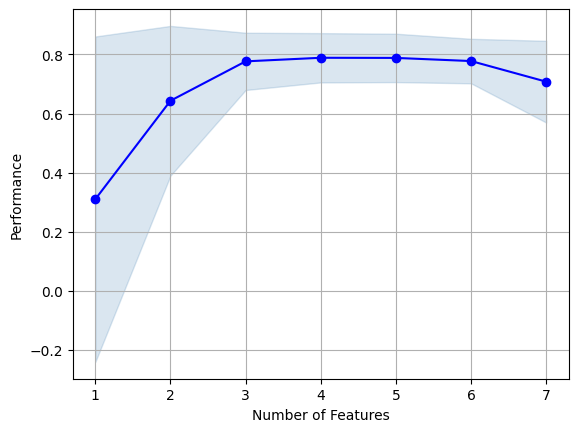

In [23]:
figura = plot_sfs(sfs_modelo.get_metric_dict(),
                  kind='std_dev',)
plt.grid()